In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv",sep="\t")

In [8]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
spam = df[df["label"] == "spam"]
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [15]:
ham = df[df["label"] == "ham"]
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [16]:
spam.shape, ham.shape

((747, 4), (4825, 4))

In [17]:
ham = ham.sample(spam.shape[0])

In [18]:
spam.shape, ham.shape

((747, 4), (747, 4))

In [20]:
data = ham.append(spam,ignore_index=True)

In [22]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


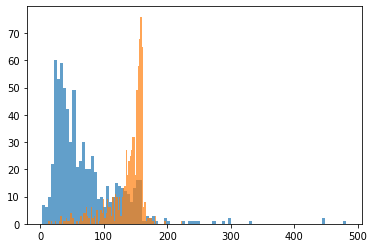

In [26]:
plt.hist(data[data["label"] == "ham"]["length"],bins=100,alpha=0.7)
plt.hist(data[data["label"] == "spam"]["length"],bins=100,alpha=0.7)
plt.show()

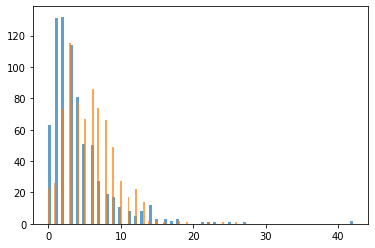

In [27]:
plt.hist(data[data["label"] == "ham"]["punct"],bins=100,alpha=0.7)
plt.hist(data[data["label"] == "spam"]["punct"],bins=100,alpha=0.7)
plt.show()

## Data Prepartion

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.corpus import stopwords
# stop = list(stopwords.words('english'))
# stop.extend('empty wow'.split())

[nltk_data] Downloading package stopwords to /home/vegito/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
data.head()

,label,message,length,punct
0,ham,Yo guess what I just dropped,28,0
1,ham,Gud mrng dear have a nice day,29,0
2,ham,Where are you lover ? I need you ...,36,4
3,ham,Y dun cut too short leh. U dun like ah? She fa...,68,5
4,ham,"Its ok, called mom instead have fun",35,1


In [41]:
x_train,x_test,y_train,y_test = train_test_split(data["message"],data["label"],test_size=0.2,random_state=42,shuffle=data["label"])

# Bag of Words

In [42]:
# vectorizer = TfidfVectorizer()

In [43]:
# x_train = vectorizer.fit_transform(x_train)

In [44]:
x_train.shape

(1195,)

## Pipeline and RF

In [63]:
clf = Pipeline(
    [
        ("tfidf",TfidfVectorizer()), 
        ("clf", RandomForestClassifier(n_estimators=100,n_jobs=-1))
    ]
)

In [64]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [65]:
y_pred = clf.predict(x_test)

In [66]:
confusion_matrix(y_test,y_pred)

array([[144,   1],
       [ 16, 138]])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       145
        spam       0.99      0.90      0.94       154

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [68]:
accuracy_score(y_test,y_pred)

0.9431438127090301

In [69]:
clf.predict(["hi how are you"])

array(['ham'], dtype=object)

In [70]:
clf.predict(["Congrats!, you have won free ticket for USA this summer, Text 'WON' to 546525"])

array(['spam'], dtype=object)

In [80]:
clf = Pipeline(
    [
        ("tfidf",TfidfVectorizer()), 
        ("clf", SVC(C=2000, gamma="auto"))
    ]
)

In [81]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=2000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [82]:
y_pred = clf.predict(x_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       145
        spam       0.98      0.92      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [84]:
accuracy_score(y_test,y_pred)

0.9464882943143813

In [85]:
clf.predict(["hi how are you"])

array(['ham'], dtype=object)

In [86]:
clf.predict(["Congrats!, you have won free ticket for USA this summer, Text 'WON' to 546525"])

array(['spam'], dtype=object)